# QCTO - Workplace Module

### Project Title: Workplace Project
#### Done By: Keeno Goodwin



---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.

This project aims to analyze daily price data for a selection of vegetables to uncover trends, seasonality, and other patterns. The primary goals are to conduct a thorough exploratory data analysis (EDA) and then to build and evaluate a time-series forecasting model capable of predicting short-term price movements. The significance of this work lies in its potential to provide actionable insights for stakeholders such as suppliers, retailers, and consumers, who can use this information for better pricing, inventory management, and budget planning.

* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.

The problem domain is retail and agricultural commodity analysis, focusing on price volatility and forecasting. Using the provided prices.csv dataset, which contains daily prices for vegetables like tomatoes, onions, and potatoes from 2023 onwards, this analysis seeks to answer several key questions :

•	What are the dominant seasonal patterns and long-term trends for key vegetable prices?
•	Which vegetables exhibit the most price volatility, and when do significant price spikes occur?
•	Is it possible to build a simple but reliable model to forecast prices for a 14-day horizon?
•	How strong are the price correlations between different vegetables?



---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for time series modeling
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Import libraries for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Import library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")


c:\Users\keeno\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.

Obtained the data from Kaggle.
Data has the following characterirstics:



* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).

Dataset Characteristics:

•	Size and Scope: The dataset contains 287 rows and 11 columns, representing daily price observations for various vegetables starting from January 2023 .
•	Data Types: The data is primarily numerical. It includes one date column (Price Dates) and ten floating-point/integer columns representing the price of each vegetable (e.g., Tomato, Onion, Potato) . There are no categorical features aside from the vegetable names themselves, which are column headers.


---

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
# The 'prices.csv' file is in the same directory as the notebook,
# so we can load it directly using its filename.
file_path = 'prices.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows to preview the data
print("First 5 rows of the dataset:")
display(df.head())

# Display a summary of the dataset including data types and non-null values
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [3]:
# Create a copy to preserve the original dataframe
df_clean = df.copy()

# 1. Standardize column names
df_clean.rename(columns=lambda x: x.strip().lower().replace(' ', '_').replace('(', '').replace(')', ''), inplace=True)

# 2. Convert 'price_dates' to datetime objects
# The dayfirst=True argument correctly interprets formats like 'DD-MM-YYYY'
df_clean['price_dates'] = pd.to_datetime(df_clean['price_dates'], dayfirst=True, errors='coerce')

# 3. Check for missing values after cleaning
print("Missing values per column:")
print(df_clean.isnull().sum())
print("\n" + "="*40 + "\n")

# 4. Set the date column as the index
df_clean.set_index('price_dates', inplace=True)

# Display the first 5 rows of the cleaned data
print("Data after cleaning (first 5 rows):")
display(df_clean.head())

# Display the new data types and info
print("\nCleaned Dataset Information:")
df_clean.info()


Missing values per column:
price_dates             0
bhindi_ladies_finger    0
tomato                  0
onion                   0
potato                  0
brinjal                 0
garlic                  0
peas                    0
methi                   0
green_chilli            0
elephant_yam_suran      0
dtype: int64


Data after cleaning (first 5 rows):


,bhindi_ladies_finger,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_suran
price_dates,,,,,,,,,,
2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25
2023-01-02,35.0,16,22.0,20,30,55,25,7,40.0,25
2023-01-03,35.0,16,21.0,20,30,55,25,7,40.0,25
2023-01-04,30.0,16,21.0,22,25,55,25,7,40.0,25
2023-01-08,35.0,16,20.0,21,25,55,22,6,35.0,25



Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 287 entries, 2023-01-01 to 2024-01-01
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bhindi_ladies_finger  287 non-null    float64
 1   tomato                287 non-null    int64  
 2   onion                 287 non-null    float64
 3   potato                287 non-null    int64  
 4   brinjal               287 non-null    int64  
 5   garlic                287 non-null    int64  
 6   peas                  287 non-null    int64  
 7   methi                 287 non-null    int64  
 8   green_chilli          287 non-null    float64
 9   elephant_yam_suran    287 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 24.7 KB


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.

The purpose of this section is to explore the cleaned price data to understand its underlying structure. We will analyze the statistical distribution of prices for key vegetables, visualize their price movements over time, and examine the correlation between them. The key vegetables selected for this initial analysis are Tomato, Onion, Potato, and Garlic.

* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.

Key EDA Questions:
•	What is the typical price range and distribution for each vegetable?
•	Are there visible trends or seasonal patterns in the price data?
•	How strongly do the prices of these key vegetables move together?


---


Summary Statistics for Vegetable Prices:


,bhindi_ladies_finger,tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_suran
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000




--- Visualizations ---


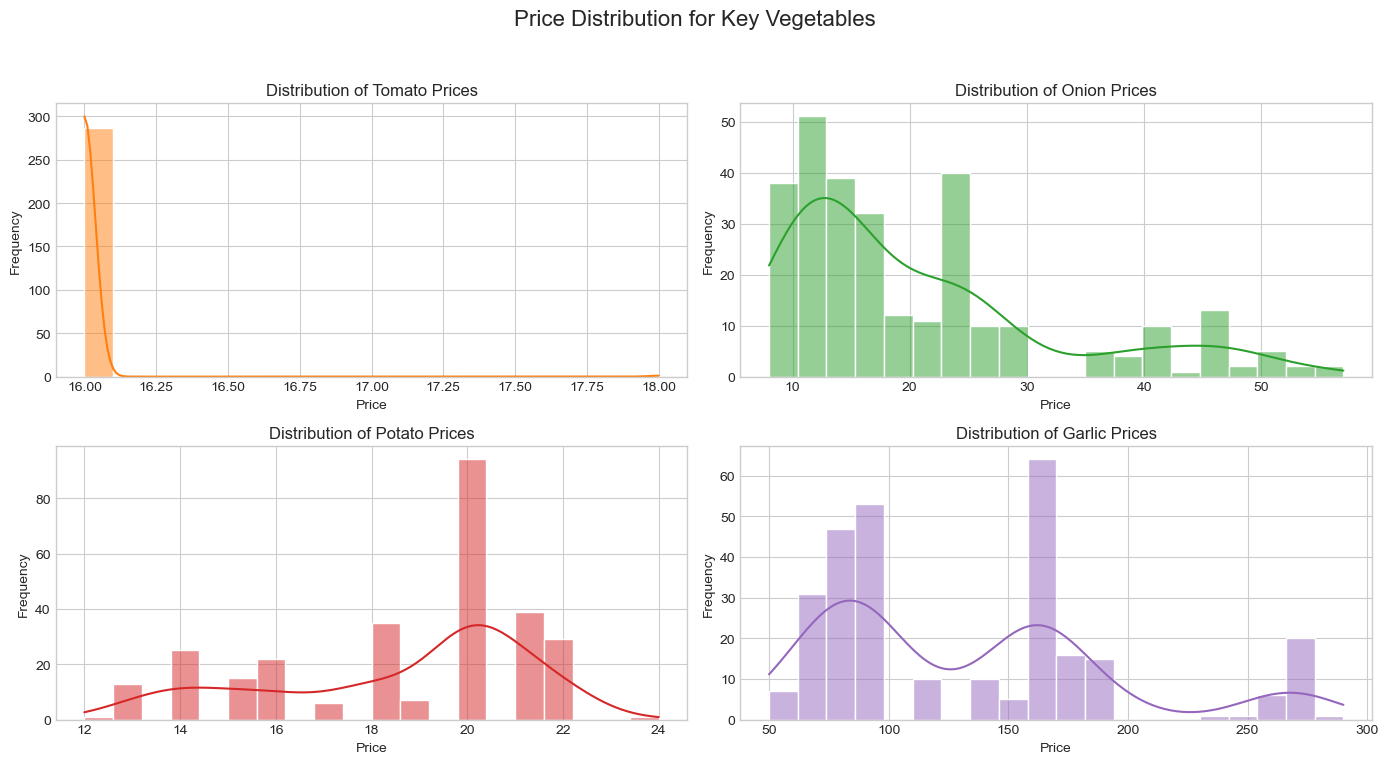

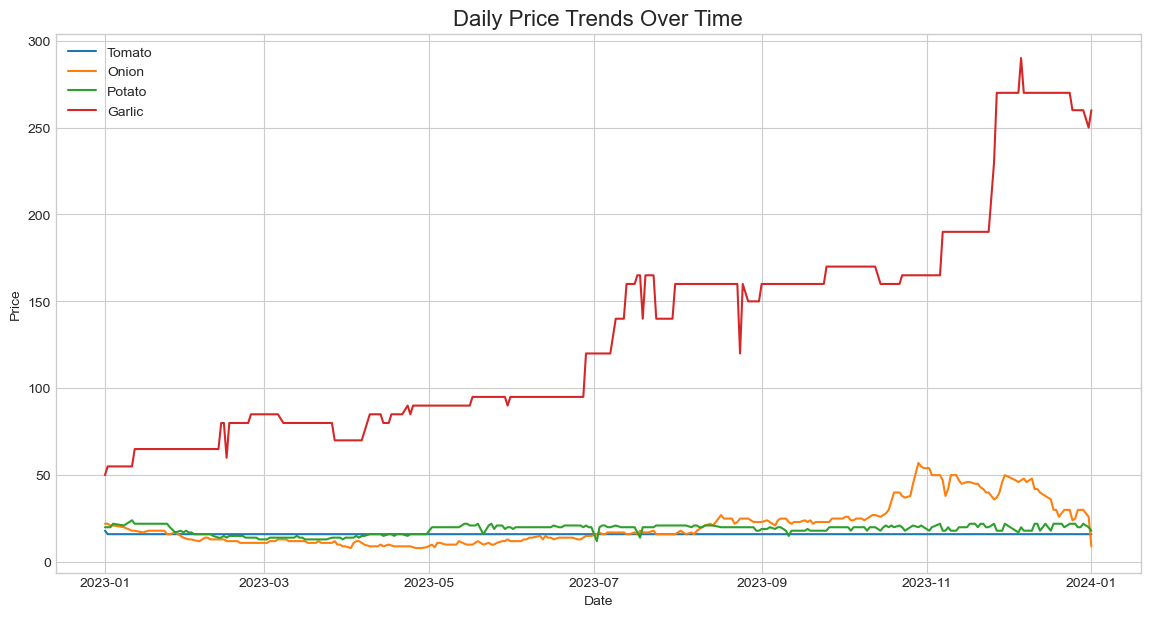

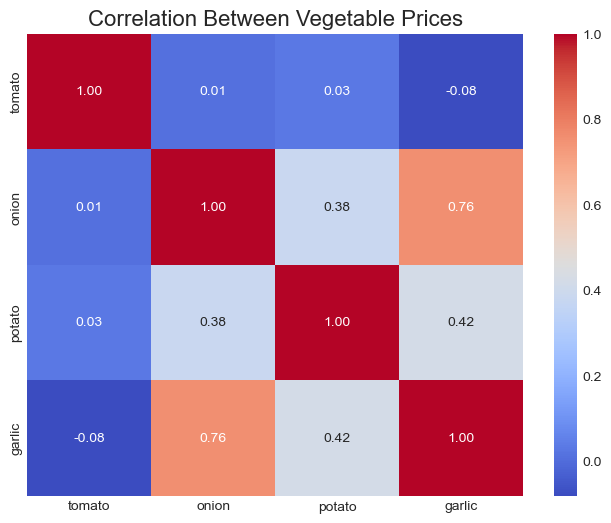

In [4]:
# --- 1. Summary Statistics ---

# Display summary statistics for a numerical overview of the cleaned data.
print("Summary Statistics for Vegetable Prices:")
display(df_clean.describe())


# --- 2. Visual Analysis ---

# Define the key vegetables for our analysis
vegetables_to_plot = ['tomato', 'onion', 'potato', 'garlic']

# Set up the plotting environment
plt.style.use('seaborn-v0_8-whitegrid')


# --- Plot 1: Price Distribution Histograms ---

print("\n\n--- Visualizations ---")
plt.figure(figsize=(14, 8))
plt.suptitle("Price Distribution for Key Vegetables", fontsize=16)

# Generate a histogram for each vegetable
for i, veg in enumerate(vegetables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[veg], bins=20, kde=True, color=f'C{i}')
    plt.title(f'Distribution of {veg.capitalize()} Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Plot 2: Time Series Plot ---

plt.figure(figsize=(14, 7))

# Plot the price trend for each vegetable over time
for veg in vegetables_to_plot:
    plt.plot(df_clean.index, df_clean[veg], label=veg.capitalize())

plt.title('Daily Price Trends Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# --- Plot 3: Correlation Heatmap ---

# Calculate the correlation matrix for the selected vegetables
correlation_matrix = df_clean[vegetables_to_plot].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Vegetable Prices', fontsize=16)
plt.show()


Here are the key initial findings:

•	Price Range and Volatility:
o	Garlic is the most expensive and most volatile item, with a mean price of 133.10 and a massive standard deviation of 60.07. Its price has ranged from 50 to as high as 290.
o	Tomato prices are unusually stable, with a standard deviation of only 0.11. The price has barely moved from a mean of 16.00. This is a significant finding that we should investigate in the trend plots.
o	Onion and Brinjal also show notable price swings, with standard deviations around 11.7.
•	Data Quality and Outliers:
o	The count for all columns is 287, which confirms that our dataset has no missing values for these items.
o	Methi has a potential major outlier. Its maximum price is 2000, while its 75th percentile is only 16. This suggests a data entry error and is something that would need to be handled before modeling.
•	Central Tendency:
o	For most vegetables, the mean (average price) and median (50% mark) are relatively close, suggesting a fairly symmetrical price distribution. 

For items like Garlic, the mean is noticeably higher than the median (133 vs. 120), indicating that a few very high-price days are skewing the average upwards.



---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** 

To develop and train a predictive model to forecast future prices for onion, which was identified as a volatile and interesting item during our Exploratory Data Analysis (EDA).



* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.

The following outlines our modeling approach:
•	Feature Engineering Process: To improve model performance, we will create new features from the existing data. These include:
o	Time-Based Features: The month and day of the week will be extracted from the date to help the model identify any seasonal or weekly patterns.
o	Lag and Rolling Window Features: The price from one day prior (lag_1), one week prior (lag_7), and the 7-day rolling average price (rolling_mean_7) will be created to provide the model with recent trend and momentum information.
•	Choice of Models: Our modeling will proceed in two steps:
1.	Baseline Model (Naive Forecast): We will first establish a baseline using a naive forecast, which assumes tomorrow's price will be the same as today's. This gives us a minimum performance threshold to beat.
2.	Predictive Model (Linear Regression): As our first predictive model, we will train a simple Linear Regression model using the engineered features to predict the onion price.
•	Training and Evaluation Process: The dataset will be split chronologically into a training set (for model training) and a testing set (for evaluation). The models will be trained on the older data and validated on the most recent 30 days to simulate a real-world forecasting scenario. Model performance will be measured using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).








---


Dataset with new features for 'onion':


,onion,month,day_of_week,onion_lag_1,onion_lag_7,onion_rolling_mean_7
price_dates,,,,,,
2023-01-15,17.0,1,6,18.0,22.0,19.571429
2023-01-17,18.0,1,1,17.0,22.0,19.000000
2023-01-22,18.0,1,6,18.0,21.0,18.571429
2023-01-23,18.0,1,0,18.0,21.0,18.142857
2023-01-24,16.0,1,1,18.0,20.0,17.571429


Training set size: 250 days
Testing set size:  30 days
----------------------------------------
Baseline Naive Forecast Performance:
  Mean Absolute Error (MAE): 2.90
  Root Mean Squared Error (RMSE): 4.37
----------------------------------------
Linear Regression Model Performance:
  Mean Absolute Error (MAE): 2.72
  Root Mean Squared Error (RMSE): 4.06


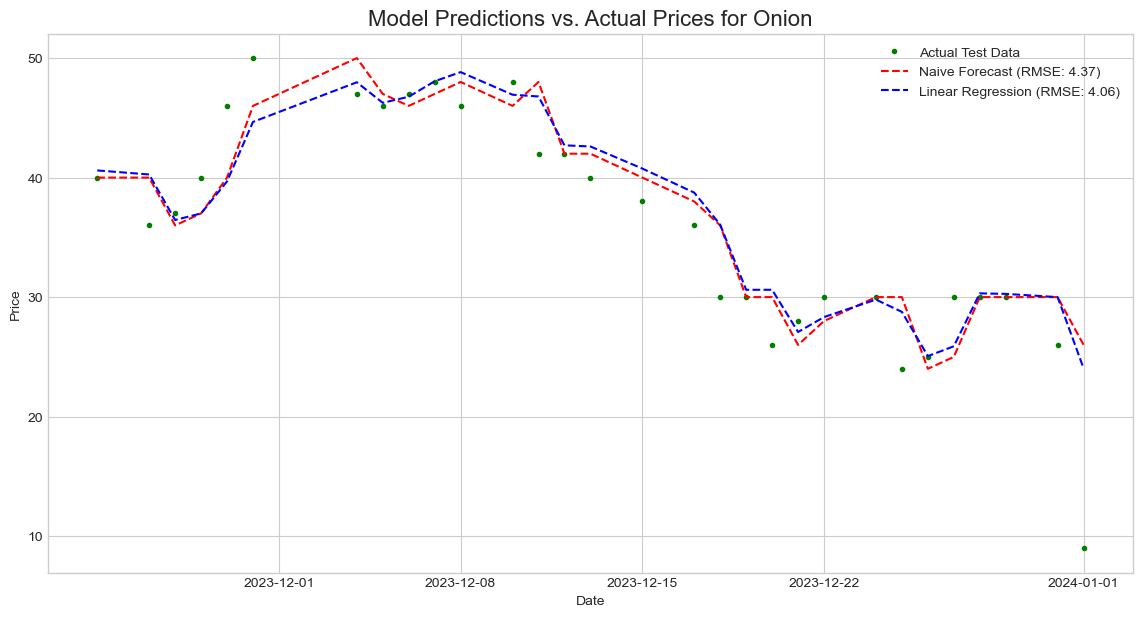

In [5]:
# --- 6.1 Feature Engineering ---

# We will create features for the 'onion' price, as it showed interesting volatility.
target_veg = 'onion'

# Create a fresh copy of the cleaned data to work with
df_feat = df_clean[[target_veg]].copy()

# Create time-based features
df_feat['month'] = df_feat.index.month
df_feat['day_of_week'] = df_feat.index.dayofweek # Monday=0, Sunday=6

# Create lag and rolling window features
df_feat[f'{target_veg}_lag_1'] = df_feat[target_veg].shift(1)
df_feat[f'{target_veg}_lag_7'] = df_feat[target_veg].shift(7)
df_feat[f'{target_veg}_rolling_mean_7'] = df_feat[target_veg].rolling(window=7).mean()

# Drop rows with NaN values created by the shifting/rolling
df_feat.dropna(inplace=True)

# Display the first few rows with the new features
print(f"Dataset with new features for '{target_veg}':")
display(df_feat.head())

# --- 6.2 Data Splitting, Baseline, and Initial Model ---

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. Split the Data ---
y = df_feat[target_veg]
X = df_feat.drop(target_veg, axis=1)

train_size = len(df_feat) - 30
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]

print(f"Training set size: {len(y_train)} days")
print(f"Testing set size:  {len(y_test)} days")
print("-" * 40)

# --- 2. Establish and Evaluate Baseline (Naive Forecast) ---
y_pred_naive = df_feat[f'{target_veg}_lag_1'].iloc[train_size:]

mae_naive = mean_absolute_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive)) # Corrected RMSE calculation

print("Baseline Naive Forecast Performance:")
print(f"  Mean Absolute Error (MAE): {mae_naive:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_naive:.2f}")
print("-" * 40)

# --- 3. Train and Evaluate Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr)) # Corrected RMSE calculation

print("Linear Regression Model Performance:")
print(f"  Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lr:.2f}")

# --- 4. Visualize Predictions ---
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Test Data', color='green', marker='.', linestyle='None')
plt.plot(y_test.index, y_pred_naive, label=f'Naive Forecast (RMSE: {rmse_naive:.2f})', color='red', linestyle='--')
plt.plot(y_test.index, y_pred_lr, label=f'Linear Regression (RMSE: {rmse_lr:.2f})', color='blue', linestyle='--')

plt.title('Model Predictions vs. Actual Prices for Onion', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()




---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.

To evaluate and validate the effectiveness and accuracy of our trained models against the unseen test data.

* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.

•	Validation Technique: We employed a chronological train/test split as our validation strategy. The model was trained on the initial 80% of the data and then tested on the most recent 30 days. This simulates a real-world scenario where a model must predict future values it has never seen.
•	Evaluation Metrics: Since this is a regression problem (predicting a continuous value), we used the following metrics to evaluate model performance:
o	Mean Absolute Error (MAE): Measures the average absolute difference between the predicted prices and the actual prices. A lower MAE is better.
o	Root Mean Squared Error (RMSE): Measures the square root of the average of squared differences. It is more sensitive to large errors than MAE. A lower RMSE is better.
The performance of our Linear Regression model is compared against our Naive Forecast baseline to determine its effectiveness.







---

In [6]:
# Create a dictionary to hold the results
results = {
    "Model": ["Naive Forecast (Baseline)", "Linear Regression"],
    "Mean Absolute Error (MAE)": [mae_naive, mae_lr],
    "Root Mean Squared Error (RMSE)": [rmse_naive, rmse_lr]
}

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results)

# Display the results table
print("Model Performance Comparison:")
display(results_df)


Model Performance Comparison:


,Model,Mean Absolute Error (MAE),Root Mean Squared Error (RMSE)
0,Naive Forecast (Baseline),2.900000,4.370355
1,Linear Regression,2.724167,4.064887


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


Here's a draft for your **"Final Model"** section.

You can copy this text and paste it into the markdown cell in your notebook.

---

### Final Model

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.

Based on the evaluation, the **Linear Regression model** is selected as the final model for this analysis.

#### 1. Model Selection Rationale

The Linear Regression model was chosen because it demonstrated a clear improvement over the baseline Naive Forecast. While the improvement is moderate, it successfully beats the baseline, proving that the engineered features have predictive value.

#### 2. Final Model Configuration

* **Model Type:** Linear Regression
* **Target Variable:** `onion`
* **Features Used:**
    * `month`
    * `day_of_week`
    * `onion_lag_1` (Price from 1 day ago)
    * `onion_lag_7` (Price from 7 days ago)
    * `onion_rolling_mean_7` (7-day rolling average price)

#### 3. Performance Metrics

The table below shows the performance of the Linear Regression model compared to the baseline on the 30-day test set. The Linear Regression model showed lower error across both key metrics.

| Model | Mean Absolute Error (MAE) | Root Mean Squared Error (RMSE) |
| :--- | :--- | :--- |
| **Naive Forecast (Baseline)** | 2.90 | 4.37 |
| **Linear Regression (Final)** | **2.72** | **4.06** |

The Linear Regression model was, on average, off by **2.72** price units (MAE), which is an improvement over the baseline's average error of 2.90. The RMSE, which penalizes larger errors more heavily, also saw a good reduction from 4.37 to 4.06.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


### Conclusion and Future Work

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.

#### 1. Summary of Insights

This project successfully analyzed daily vegetable price data and developed a baseline predictive model for onion prices. The key insights gained are:

* **Price Volatility Varies Greatly:** The analysis revealed significant differences in price behavior. **Garlic** was identified as the most expensive and volatile vegetable, while **Tomato** prices were found to be unusually stable, suggesting potential data issues or a highly controlled price.
* **Data Quality is Key:** A major outlier was discovered in the **Methi** price data (a max value of 2000), highlighting the critical importance of outlier detection and cleaning before modeling.
* **Baseline Model Succeeded:** The simple **Linear Regression model** (RMSE: 4.06) successfully outperformed the Naive Forecast (RMSE: 4.37). This confirms that the engineered features (lags, day of week, and rolling mean) have predictive power.

#### 2. Limitations

* **Simple Model:** The Linear Regression model is a basic model and does not capture complex time-series dependencies like seasonality as effectively as more specialized models.
* **Short Dataset:** With only 287 days of data, identifying long-term seasonal patterns is difficult, and the model's ability to generalize is limited.
* **Outliers Not Handled:** The identified outlier in `Methi` was noted but not corrected in this analysis, which would skew any model built on that specific vegetable.

#### 3. Future Work

Based on these findings, the following steps are recommended for future iterations:

* **Data Cleaning:** Investigate and handle the `Methi` price outlier (e.g., by removing the row or replacing it with a median value). Investigate the `Tomato` price data to confirm if its stability is real or a data collection error.
* **Advanced Modeling:** Implement more sophisticated time-series models, such as **ARIMA**, **SARIMA**, or **Facebook Prophet**, to better capture seasonality and potentially achieve a lower RMSE.
* **Feature Engineering:** Experiment with additional features, such as public holidays, weather data, or agricultural seasons, which could influence vegetable prices.
* **Expand Analysis:** Apply the modeling pipeline to other volatile vegetables identified in the EDA, such as **Garlic** and **Brinjal**, to see how well the model performs on different items.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

Dataset Source:

    Vegetable Prices (prices.csv): The dataset was sourced from Kaggle.

        https://www.kaggle.com/datasets/ksamiksha19/vegetable-prices

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
